### QUEST
- apply() : '신장', '체중' -> BMI
- BMI 시각화 및 인사이트 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [3]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


In [4]:
df_BMI = df_ROS[['체중','신장']]
df_BMI.head().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체중      5 non-null      float64
 1   신장      5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes


In [5]:
df_BMI['체중']=df_BMI['체중'].astype(int)
df_BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   체중      1894 non-null   int32
 1   신장      1894 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 22.3 KB


C:\Users\82102\AppData\Local\Temp\ipykernel_13588\2753804555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMI['체중']=df_BMI['체중'].astype(int)


In [6]:
def cal_BMI (data):
    weight = data['체중']
    height = data['신장'] / 100  # 키를 cm에서 m로 변환
    bmi = weight/(height * height)
    return bmi

In [7]:
df_BMI['BMI수치값']= df_BMI.apply(cal_BMI, axis=1)
df_BMI['BMI수치값'][:2]
df_BMI

C:\Users\82102\AppData\Local\Temp\ipykernel_13588\2893269100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMI['BMI수치값']= df_BMI.apply(cal_BMI, axis=1)


,체중,신장,BMI수치값
0,60,163,22.582709
1,71,171,24.280975
2,77,178,24.302487
3,74,174,24.441802
4,80,183,23.888441
...,...,...,...
1889,64,157,25.964542
1890,59,157,23.936062
1891,70,167,25.099502
1892,77,177,24.577867


In [8]:
def BMI판별(Bmi) :
    if Bmi < 18.5:
        return '저체중'
    elif Bmi < 24.9:
        return '정상체중'
    elif Bmi < 29.9:
        return '과체중'
    else:
        return '비만'

In [9]:
df_BMI['BMI판별']= df_BMI['BMI수치값'].apply(BMI판별)
df_BMI['BMI판별'].value_counts()

C:\Users\82102\AppData\Local\Temp\ipykernel_13588\1850311012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMI['BMI판별']= df_BMI['BMI수치값'].apply(BMI판별)


정상체중    1372
과체중      420
비만        63
저체중       39
Name: BMI판별, dtype: int64

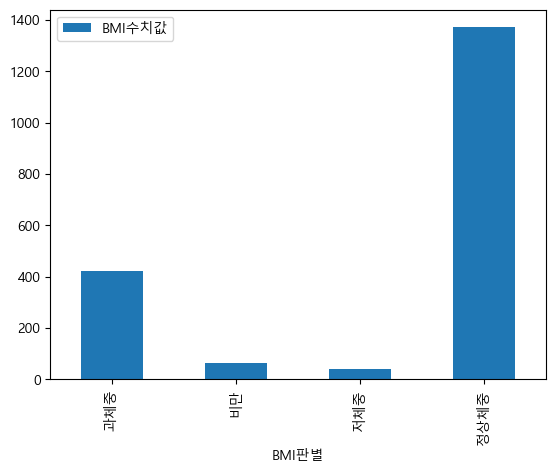

In [10]:
df_BMI_pivot = pd.pivot_table(data=df_BMI[['BMI판별','BMI수치값']], index='BMI판별', aggfunc=len).plot(kind='bar')

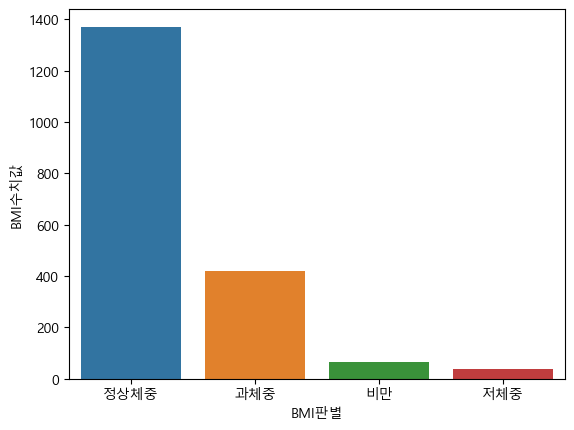

In [11]:
sns.barplot(data=df_BMI, x='BMI판별', y='BMI수치값', estimator=len )
plt.show()

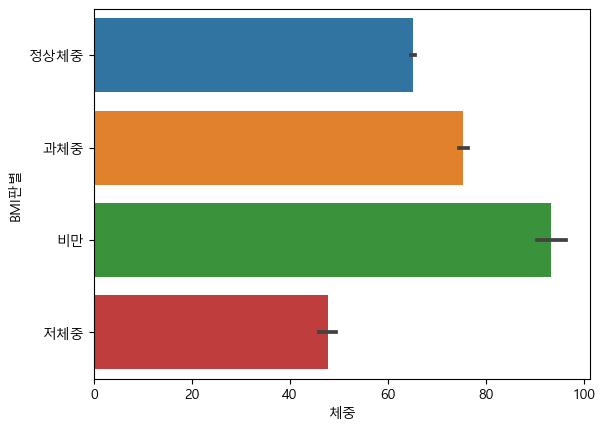

In [12]:
sns.barplot(data=df_BMI, x='체중', y='BMI판별')
plt.show()

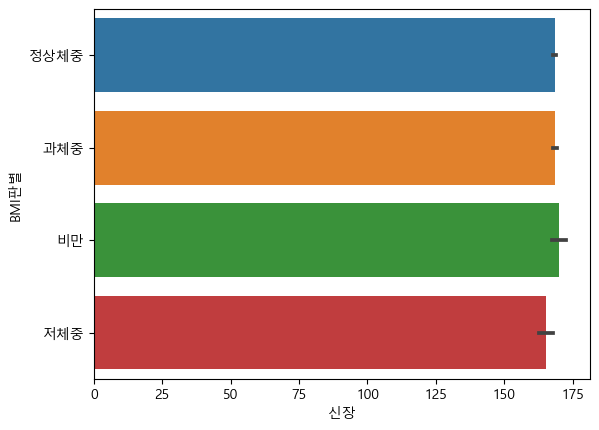

In [13]:
filter = df_BMI[(df_BMI['신장'] >= 150) & (df_BMI['신장'] <= 200)]
sns.barplot(data=filter, x='신장', y='BMI판별')
plt.show()

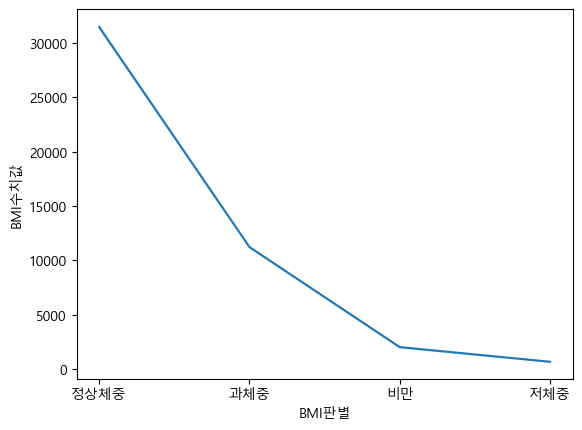

In [15]:
sns.lineplot(data=df_BMI,  x='BMI판별', y='BMI수치값' ,estimator='sum')
plt.show()

In [15]:
df_BMI.corr()

C:\Users\01-10\AppData\Local\Temp\ipykernel_15448\3239467327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_BMI.corr()


,체중,신장,BMI수치값
체중,1.000000,0.703618,0.744061
신장,0.703618,1.000000,0.055537
BMI수치값,0.744061,0.055537,1.000000
